<a href="https://colab.research.google.com/github/ejrtks1020/Pytorch-basic/blob/main/PyTorch_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#시그모이드 함수

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

## W가 1이고 b가 0인 그래프

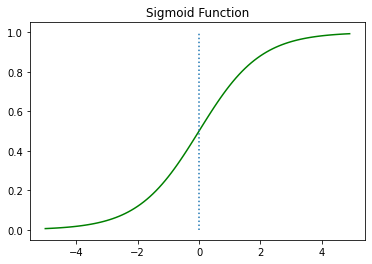

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0, 0], [0, 1], ':')
plt.title('Sigmoid Function')
plt.show()

위 그래프를 통해서 시그모이드함수는 출력값을 0과 1사이의 값으로 조정하여 반환하는것을 알 수 있다.

x가 0일때는 0.5의 값을 가지며, x가 매우 커지면 1에 수렴한다. 반면 x가 매우 작아지면 0에 수렴한다

# W값의 변화에 따른 경사도 변화

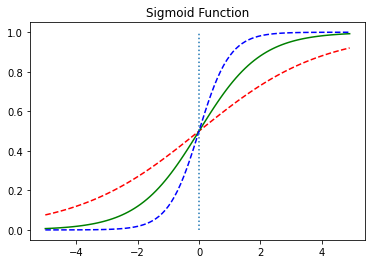

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', linestyle = '--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle = '--')
plt.plot([0,0], [0, 1], ':')
plt.title('Sigmoid Function')
plt.show()


#b값의 변화에 따른 좌, 우 이동

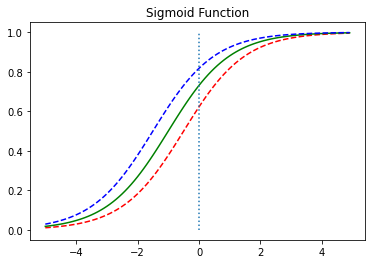

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1.0)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, 'r', linestyle = '--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle = '--')
plt.plot([0,0], [0,1], ':')
plt.title("Sigmoid Function")
plt.show()

# 파이토치로 로지스틱 회귀 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
X_train = torch.FloatTensor([[1,2], [2,3], [3, 1], [4, 3], [5,3], [6,2]])
y_train = torch.FloatTensor([[0], [0], [0], [1], [1], [1]])
print(X_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


곱해지는 가중치 벡터를 W라고 했을때 XW가 성립하기 위해서는 W벡터의 크기는 2 x 1이어야 한다.

In [ ]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
hypothesis = 1 / (1 + torch.exp(-(X_train.matmul(W) + b)))

In [ ]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [ ]:
#torch.sigmoid 함수 사용
hypothesis = torch.sigmoid(X_train.matmul(W) + b)
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [ ]:
print(y_train)

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [ ]:
# 하나의 데이터에 대한 오차
-(y_train[0] * torch.log(hypothesis[0]) + (1 - y_train[0]) * torch.log(1-hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [ ]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [ ]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [ ]:
#파이토치에서 로지스틱회귀의 비용함수 사용
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
# 전체 코드

W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W, b], lr = 1)

epochs = 1000
for epoch in range(epochs + 1):

  # Cost 계산
  hypothesis = torch.sigmoid(X_train.matmul(W) + b)
  cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, epochs, cost.item()
    ))
  
  

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
#훈련된 W, b 값으로 예측
hypothesis = torch.sigmoid(X_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


0.5를 넘으면 True, 넘지않으면 False로 출력


In [ ]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [ ]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
